In [1]:
import pandas as pd

In [49]:
#importing identified aca posts
posts = pd.read_csv('../data/processed/aca_posts_2.csv')

posts.head()

,Unnamed: 0,Unnamed: 0.1,selftext,title,time_created,processed_text,processed_title
0,15,15,My sister-in-law in central Pennsylvania is lo...,Any Pennsylvania folks in here? Question about...,2021-02-15 19:47:49,sister-in-law central pennsylvania losing heal...,pennsylvania folks question gotchas exchange p...
1,21,21,It’s really important that I’m able to change ...,Cannot change plans on healthcare.gov even tho...,2021-02-15 15:33:18,it’s really important i’m able change plans pe...,cannot change plans even though special enroll...
2,35,35,My wife has the option to stay on COBRA throug...,Currently on COBRA after job loss. Will Market...,2021-02-14 07:24:09,wife option stay cobra september medical issue...,currently cobra job loss marketplace open enro...
3,93,99,Browsing ACA plans and I see that some are mar...,HSA with ACA plans,2021-02-10 18:34:40,"browsing aca plans see marked ""eligible health...",hsa aca plans
4,108,117,"Hi,\n\nIn December I signed up for a new insur...",Can I change plans during the upcoming open en...,2021-02-08 22:42:37,hi december signed new insurance provider morn...,change plans upcoming open enrollment extension


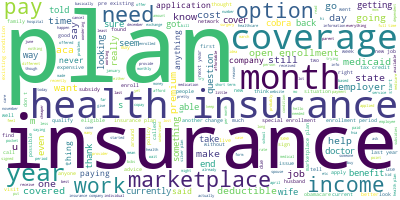

In [50]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
#first titles
long_string = ','.join(list(posts['processed_title'].values))

#now join the post text
long_string = ','.join(list(posts['processed_text'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
%matplotlib inline

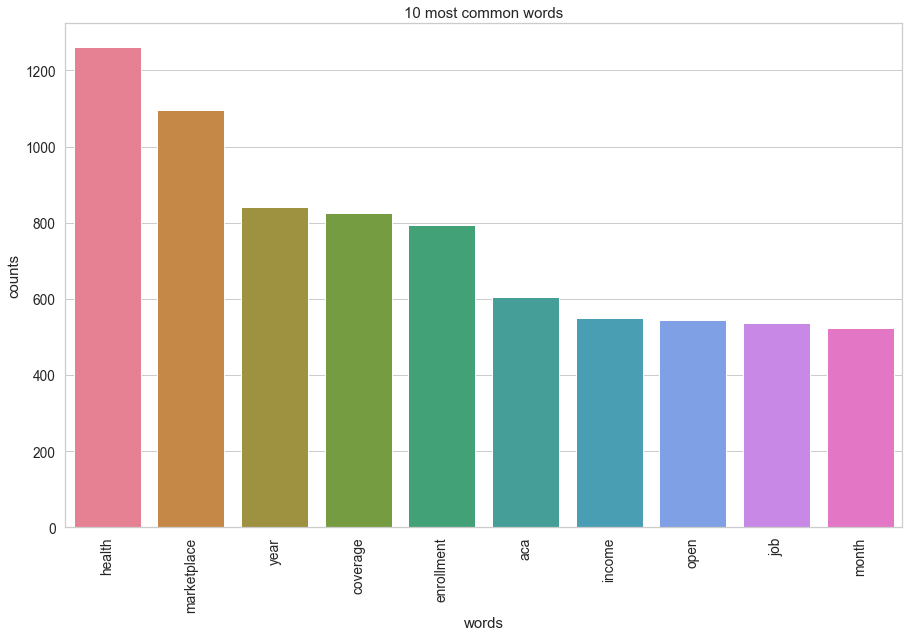

In [51]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

#making a column that is all text
posts['all_text'] = posts['processed_title'].str.cat(posts['processed_text'], sep = ' ')

#getting rid of 'insurance'
posts['all_text'] = posts['all_text'].map(lambda x: re.sub('insurance', '', x))

#getting rid of 'plan'
posts['all_text'] = posts['all_text'].map(lambda x: re.sub('plan', '', x))

#removing extra spaces
posts['all_text'] = posts['all_text'].replace(r"  ", " ", regex=True)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['all_text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [6]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [7]:
number_words = 15

#topics = [5, 10, 20, 50, 100, 250]

topics = [10, 15, 20, 25, 35, 50]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('******************************************************************************************************************************')

With 10 number of topics
Topics found via LDA:

Topic #0:
year month income job subsidy health marketplace new ve condition policy existing time pre help

Topic #1:
enrollment open coverage health job period new special time need cobra employer months year month

Topic #2:
health marketplace income medicaid aca year care pay time need help taxes coverage state question

Topic #3:
marketplace coverage tax year income job health credit pay month premium qualify new know medicaid

Topic #4:
marketplace medicaid got application know health coverage time state called year denied sent aca income

Topic #5:
bronze health pay care deductible kaiser hmo wife ppo blue need covered anthem cover like

Topic #6:
income year aca enrollment network medicaid care 2019 open ve subsidy kids ll make month

Topic #7:
deductible health year month pocket silver doctor pay marketplace max need visits premium hsa coverage

Topic #8:
pay health ve aca medicare able marketplace way network really care like got 

In [39]:
posts['all_text'][0]

'pennsylvania folks question gotchas exchange s sister-in-law central pennsylvania losing health asked help picking good (her kids grown way) think best options cobra ex-husband\'s employer group coverage available direct marketing firm independent contractor (she probably qualify subsidies) currently looking faith-based s medically underwritten policies i\'m trying steer away pennsylvania people - suggestions gotchas look exchange s example live massachusetts typically steer people away tufts direct bmc healthnet exchange s due restrictive networks see keywords like "options" "hccs" know i\'m dealing tiered network massachusetts also highly integrated healthcare system - every provider hospital state participates 4 top health carriers - understand unusual know pennsylvania health ecosystem tricky (how many bcbs companies one state even need) anyone advice specific carriers avoid keywords watch suggestions get good relatively low-cost coverage central region state thanks'

In [54]:
posts['all_text'] = posts['all_text'].map(lambda x: re.sub(r'i\'m', 'i am', x))
posts['all_text'] = posts['all_text'].map(lambda x: re.sub(' s ', ' ', x))
posts['all_text'] = posts['all_text'].map(lambda x: re.sub(r' \'', '', x))
posts['all_text'] = posts['all_text'].map(lambda x: re.sub(r'\'', '', x))

posts['all_text'] = posts['all_text'].replace(r"  ", " ", regex=True)

posts['all_text'][2]

'currently cobra job loss marketplace open enrollment coverage begin march 1 wife option stay cobra september medical issue covered needs addressed asap enroll better open enrollment (begins monday 15th sure national holiday delay application 16th) coverage begin ill try confirm directly marketplace hope someone answer ning purposes found info elsewhere online'

In [34]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
